## Overview of the Data

In [7]:
import pandas as pd
import sqlite3
conn= sqlite3.connect("factbook.db")
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1,conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [8]:
q2 = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q2,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


## Summary Statistics

In [10]:
q4 = '''
SELECT MIN(population),
MAX(population),
MIN(population_growth),
MAX(population_growth)
FROM facts;
'''
pd.read_sql_query(q4,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


## Exploring Outliers

In [12]:
q5 = '''
SELECT * FROM facts
WHERE population = (SELECT MIN(population) FROM facts)'''
pd.read_sql_query(q5,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [13]:
q6 = '''
SELECT * FROM facts
WHERE population = (SELECT MAX(population) FROM facts)'''
pd.read_sql_query(q6,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


Antarctica has the lowest listed population at 0, and the highest listed population is actually the whole world.

## Histograms

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb15e5e9b38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb15e0c8940>]], dtype=object)

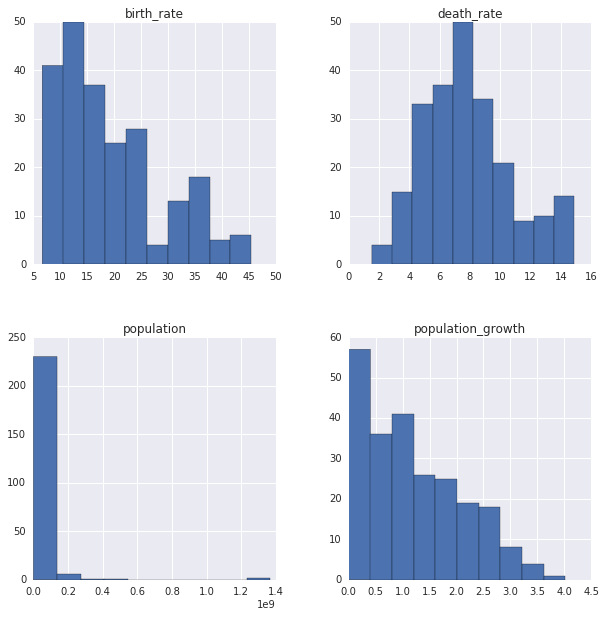

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q7 = '''
SELECT population,
population_growth,
birth_rate,
death_rate FROM facts
WHERE (population != (SELECT MAX(population) FROM facts)) 
AND (population != (SELECT MIN(population) FROM facts))'''
pd.read_sql_query(q7,conn).hist(ax=ax)

## Population Density
Which countries have the highest population density?

In [17]:
q8 = '''
SELECT name,
cast(population as float)/cast(area as float) density
FROM facts
ORDER BY density DESC
LIMIT 20'''
pd.read_sql_query(q8, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb15d785780>]], dtype=object)

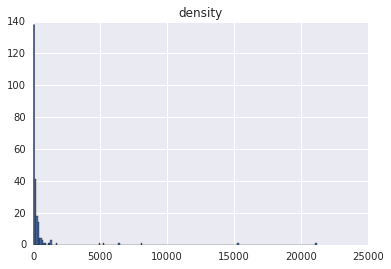

In [31]:
q9 = '''
SELECT name,
cast(population as float)/cast(area as float) density
FROM facts'''
pd.read_sql_query(q9, conn).hist(bins=200)

There are a few very dense countries in the world, and the rest have relatively low density.These highest density countries are probably also some of the smallest.

## Water and Land
Which countries have the highest ratios of water to land?
Which countries have more water than land?

In [32]:
q10 = '''
SELECT name,
area_water,
area_land
FROM facts
WHERE area_water > area_land'''
pd.read_sql_query(q10,conn)

,name,area_water,area_land
0,British Indian Ocean Territory,54340,60
1,Virgin Islands,1564,346


Only two countries have more water area than land area listed. British Indian Ocean Territory and the Virgin Islands.

In [33]:
q11 = '''
SELECT name,
CAST(area_water as Float) / CAST(area_land as Float) ratio
FROM facts
ORDER BY ratio DESC
LIMIT 20'''
pd.read_sql_query(q11,conn)

,name,ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb15d3f8080>]], dtype=object)

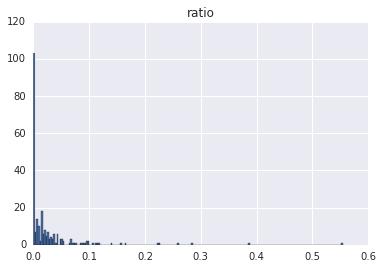

In [34]:
q12 = '''
SELECT name,
CAST(area_water as Float) / CAST(area_land as Float) ratio
FROM facts
WHERE ratio < 1'''
pd.read_sql_query(q12,conn).hist(bins=200)

List includes lots of islands, or costal countries with long coastlines.